In [22]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import requests
import yfinance as yf

In [23]:
def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
    url = 'https://coinmarketcap.com/es/'
    respuesta = requests.get(url,headers=headers)
    s = BeautifulSoup(respuesta.content, features = 'lxml')
    precio = s.findAll('div', {'class':['sc-a0353bbc-0 gDrtaY','sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
    for item in precio:
        precio_actual = float(item.getText().strip().replace('$', '').replace(',', ''))
    list = []
    respuesta = s.findAll('span', {'class':['sc-d55c02b-0 iwhBxy','sc-d55c02b-0 gUnzUB']})
    for item in respuesta[::3]:
        list.append(item)
    for i in range(len(list)):
        if list[i].find('span')['class'][0] == 'icon-Caret-down':
              tendencia = 'Baja'
        else:
              tendencia = 'Alta'

In [24]:
def importar_base_bitcoin(symbol):
    global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
    btc = yf.Ticker(symbol)
    historical_data = btc.history(period="7d", interval="5m")
    df_bitcoin = pd.DataFrame(historical_data)

In [25]:
importar_base_bitcoin('BTC-USD')
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-17 00:00:00+00:00,28522.097656,28540.667969,28514.380859,28540.667969,0,0.0,0.0
2023-10-17 00:05:00+00:00,28546.552734,28559.431641,28512.556641,28512.556641,24692736,0.0,0.0
2023-10-17 00:10:00+00:00,28512.556641,28512.556641,28499.109375,28499.109375,20992000,0.0,0.0
2023-10-17 00:15:00+00:00,28484.177734,28484.177734,28463.269531,28463.269531,0,0.0,0.0
2023-10-17 00:20:00+00:00,28465.617188,28472.287109,28465.617188,28472.287109,14622720,0.0,0.0


In [44]:
def limpieza_datos():
    global media_bitcoin, df_bitcoin_limpio
    df_bitcoin_limpio = df_bitcoin.copy()
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.index.duplicated(keep='first')]
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio["Close"].isnull()]
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio["Volume"] > 0]
    Q1 = df_bitcoin_limpio["Close"].quantile(0.25)
    Q3 = df_bitcoin_limpio["Close"].quantile(0.75)
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio["Close"] >= Q1) & (df_bitcoin_limpio["Close"] <= Q3)]
    media_bitcoin = df_bitcoin_limpio["Close"].mean()
    media_bitcoin

La media es nan


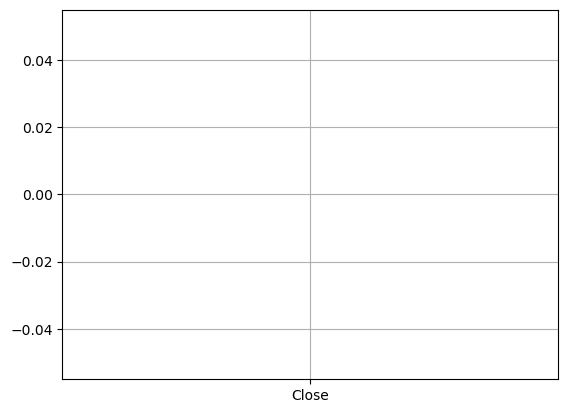

In [45]:
limpieza_datos()
df_bitcoin_limpio.boxplot(['Close'])
print(f'La media es {media_bitcoin}')